# Preparing the data for visualization

In [1]:
import os
import geopandas as gpd
import pandas as pd

I'll be changing my directory to the folder where I extracted the data that I downloaded from [here](https://droughtmonitor.unl.edu/DmData/GISData.aspx)

In [3]:
os.chdir('./2020_USDM_M/')

I'll be merging all the 52 week data in to one file because it'll be much easier to deal with one data. So I just need the shapefiles and read them with geopandas and merge it into one dataset and then save that. You can do this part with QGIS/GDAL as well from the processing toolbox.

In [4]:
shapefiles = [i for i in os.listdir() if i.endswith('.shp')]

In [5]:
shapefiles

['USDM_20210105.shp',
 'USDM_20210112.shp',
 'USDM_20210119.shp',
 'USDM_20210126.shp',
 'USDM_20210202.shp',
 'USDM_20210209.shp',
 'USDM_20210216.shp',
 'USDM_20210223.shp',
 'USDM_20210302.shp',
 'USDM_20210309.shp',
 'USDM_20210316.shp',
 'USDM_20210323.shp',
 'USDM_20210330.shp',
 'USDM_20210406.shp',
 'USDM_20210413.shp',
 'USDM_20210420.shp',
 'USDM_20210427.shp',
 'USDM_20210504.shp',
 'USDM_20210511.shp',
 'USDM_20210518.shp',
 'USDM_20210525.shp',
 'USDM_20210601.shp',
 'USDM_20210608.shp',
 'USDM_20210615.shp',
 'USDM_20210622.shp',
 'USDM_20210629.shp',
 'USDM_20210706.shp',
 'USDM_20210713.shp',
 'USDM_20210720.shp',
 'USDM_20210727.shp',
 'USDM_20210803.shp',
 'USDM_20210810.shp',
 'USDM_20210817.shp',
 'USDM_20210824.shp',
 'USDM_20210831.shp',
 'USDM_20210907.shp',
 'USDM_20210914.shp',
 'USDM_20210921.shp',
 'USDM_20210928.shp',
 'USDM_20211005.shp',
 'USDM_20211012.shp',
 'USDM_20211019.shp',
 'USDM_20211026.shp',
 'USDM_20211102.shp',
 'USDM_20211109.shp',
 'USDM_202

Now I know none of these shapefiles contain their layer name in the attribute table. And I need to know which layer is from which date. So what I've done here is create a function that adds the layer name into a seperate column. I can use it to extract the dates with `regular expression` and put it into a new column.

In [6]:
def shapefile(idx):
    file = gpd.read_file(shapefiles[idx])
    file['layer'] = shapefiles[idx][:-4]
    return file

Now lets merge all the data into one data

In [7]:
gdf = gpd.GeoDataFrame(pd.concat([shapefile(i) for i in range(len(shapefiles))], ignore_index=True))

In [8]:
gdf.head()

,OBJECTID,DM,Shape_Leng,Shape_Area,geometry,layer
0,1,0,5.980410e+07,1.367589e+12,"MULTIPOLYGON (((-66.17931 18.13793, -66.18203 ...",USDM_20210105
1,2,1,3.797837e+07,1.004673e+12,"MULTIPOLYGON (((-66.42514 18.27961, -66.46215 ...",USDM_20210105
2,3,2,3.480560e+07,9.194286e+11,"MULTIPOLYGON (((-97.64720 26.01237, -97.64734 ...",USDM_20210105
3,4,3,2.485020e+07,9.067492e+11,"MULTIPOLYGON (((-98.66225 26.24203, -98.66070 ...",USDM_20210105
4,5,4,9.430881e+06,7.372491e+11,"MULTIPOLYGON (((-102.48568 38.29119, -102.6014...",USDM_20210105


In [9]:
gdf.shape

(260, 6)

In [10]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Alright! Now everything seems just the way I want it to be. However, I don't like the WGS 84 projection for USA. So I'll change the projection to *`North America Albers Equal Area Conic.`* which has the epsg code of `ESRI:102008`

In [11]:
gdf.to_crs(crs='ESRI:102008', inplace=True)

Like I said, I need to know the dates of each layer. So I've extracted the dates from the layer name and put it into different column and format it in a human readable date.

In [12]:
gdf['date'] = gdf['layer'].str.extract('(\d+)')

In [13]:
gdf['date'] = pd.to_datetime(gdf['date']).dt.strftime('%d %B, %Y')

<AxesSubplot:>

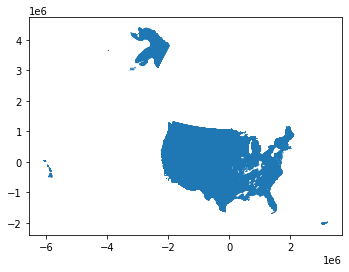

In [14]:
gdf.plot()

Everyting seems to be working just the way I wanted. So I'll just export the dataframe as a shapefile and the plot each layer later!

In [15]:
gdf.to_file('../Cleaned/USDM_2021.shp')